# Предизвикателство: Анализ на текст за наука за данни

> *В тази тетрадка експериментираме с използването на различни URL адреси - статия от Уикипедия за машинно обучение. Можете да видите, че за разлика от науката за данни, тази статия съдържа много термини, което прави анализа по-проблематичен. Трябва да измислим друг начин за почистване на данните след извличането на ключови думи, за да се отървем от някои често срещани, но незначителни словосъчетания.*

В този пример ще направим просто упражнение, което обхваща всички стъпки на традиционния процес в науката за данни. Не е необходимо да пишете код, просто можете да кликнете върху клетките по-долу, за да ги изпълните и да наблюдавате резултата. Като предизвикателство, ви насърчаваме да изпробвате този код с различни данни.

## Цел

В този урок обсъждахме различни концепции, свързани с науката за данни. Нека се опитаме да открием повече свързани концепции, като направим **текстов анализ**. Ще започнем с текст за науката за данни, ще извлечем ключови думи от него и след това ще се опитаме да визуализираме резултата.

Като текст ще използвам страницата за науката за данни от Уикипедия:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Стъпка 1: Получаване на данните

Първата стъпка във всеки процес на анализ на данни е получаването на данните. Ще използваме библиотеката `requests`, за да направим това:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Стъпка 2: Преобразуване на данните

Следващата стъпка е да преобразуваме данните във форма, подходяща за обработка. В нашия случай сме изтеглили HTML изходния код от страницата и трябва да го преобразуваме в обикновен текст.

Има много начини, по които това може да се направи. Ще използваме най-простия вграден обект [HTMLParser](https://docs.python.org/3/library/html.parser.html) от Python. Трябва да наследим класа `HTMLParser` и да дефинираме код, който ще събира целия текст вътре в HTML таговете, с изключение на `<script>` и `<style>` таговете.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Стъпка 3: Получаване на прозрения

Най-важната стъпка е да превърнем нашите данни във форма, от която можем да извлечем прозрения. В нашия случай искаме да извлечем ключови думи от текста и да видим кои ключови думи са по-съществени.

Ще използваме Python библиотека, наречена [RAKE](https://github.com/aneesha/RAKE), за извличане на ключови думи. Първо, нека инсталираме тази библиотека, ако не е налична:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Основната функционалност е достъпна от обекта `Rake`, който можем да персонализираме с помощта на някои параметри. В нашия случай ще зададем минималната дължина на ключова дума на 5 символа, минималната честота на ключова дума в документа на 3 и максималния брой думи в ключова дума - на 2. Чувствайте се свободни да експериментирате с други стойности и да наблюдавате резултата.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Получихме списък с термини заедно със свързаната степен на важност. Както можете да видите, най-важните дисциплини, като машинно обучение и големи данни, са представени в списъка на водещи позиции.

## Стъпка 4: Визуализация на резултата

Хората най-добре интерпретират данните в визуална форма. Затова често има смисъл да се визуализират данните, за да се извлекат някои прозрения. Можем да използваме библиотеката `matplotlib` в Python, за да начертаем проста дистрибуция на ключовите думи с тяхната релевантност:


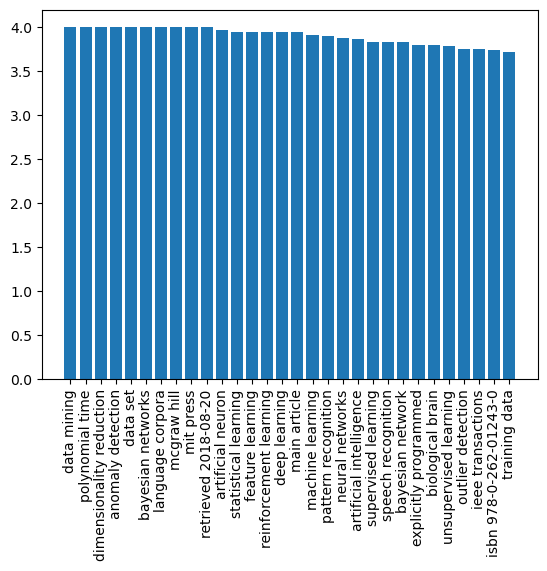

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Има обаче още по-добър начин за визуализиране на честотата на думите - използване на **Word Cloud**. Ще трябва да инсталираме друга библиотека, за да създадем облак от думи от нашия списък с ключови думи.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` обектът е отговорен за приемането на оригинален текст или предварително изчислен списък от думи с техните честоти и връща изображение, което след това може да бъде показано с помощта на `matplotlib`:


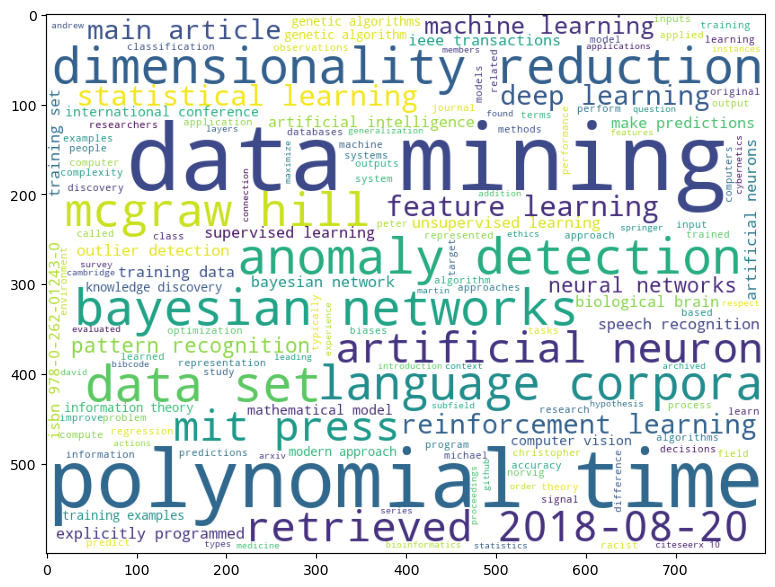

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Можем също да подадем оригиналния текст на `WordCloud` - нека видим дали ще успеем да получим подобен резултат:


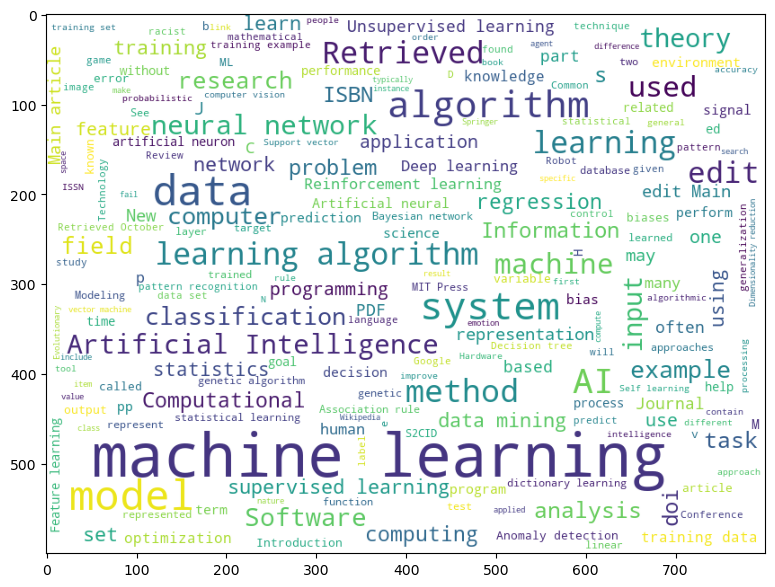

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Можете да видите, че облакът от думи сега изглежда по-впечатляващ, но също така съдържа много шум (например несвързани думи като `Retrieved on`). Освен това получаваме по-малко ключови думи, състоящи се от две думи, като *data scientist* или *computer science*. Това е така, защото алгоритъмът RAKE се справя много по-добре с избора на подходящи ключови думи от текста. Този пример илюстрира важността на предварителната обработка и почистването на данни, защото ясната картина в края ще ни позволи да вземаме по-добри решения.

В това упражнение преминахме през прост процес на извличане на смисъл от текст в Уикипедия под формата на ключови думи и облак от думи. Този пример е доста опростен, но добре демонстрира всички типични стъпки, които един специалист по данни предприема при работа с данни, започвайки от придобиването на данни до визуализацията.

В нашия курс ще обсъдим всички тези стъпки в детайли.



---

**Отказ от отговорност**:  
Този документ е преведен с помощта на AI услуга за превод [Co-op Translator](https://github.com/Azure/co-op-translator). Въпреки че се стремим към точност, моля, имайте предвид, че автоматизираните преводи може да съдържат грешки или неточности. Оригиналният документ на неговия роден език трябва да се счита за авторитетен източник. За критична информация се препоръчва професионален човешки превод. Не носим отговорност за недоразумения или погрешни интерпретации, произтичащи от използването на този превод.
